### Task 1: Introduction to Isolation Forest
**Description**: Install the necessary library and load a sample dataset.

**Steps**:
1. Install scikit-learn
2. Load a sample dataset using Python

In [13]:
# Step 1: Install scikit-learn (only run this once, or if not already installed)
# Uncomment the next line if needed
# !pip install scikit-learn

# Step 2: Import libraries
from sklearn.datasets import load_iris
import pandas as pd

# Step 3: Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Optional: Add target labels if needed
y = pd.Series(iris.target, name='target')
df = X.copy()
df['target'] = y

# Step 4: Display the dataset
print(df.head())  # Show the first few rows


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


### Task 2: Building an Isolation Forest
**Description**: Initialize an Isolation Forest model and fit it to the Boston dataset.

**Steps**:
1. Initialize Isolation Forest
2. Fit model

In [14]:
# write your code from here
# Step 1: Install necessary libraries (if not already installed)
# !pip install scikit-learn pandas

# Step 2: Import libraries
from sklearn.ensemble import IsolationForest
from sklearn.datasets import fetch_openml
import pandas as pd

# Step 3: Load the Boston dataset from OpenML
boston = fetch_openml(name='boston', version=1, as_frame=True)
X = boston.data

# Step 4: Initialize the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)

# Step 5: Fit the model to the data
iso_forest.fit(X)

# Optional: Predict anomalies
predictions = iso_forest.predict(X)

# Step 6: Add predictions to DataFrame
X['anomaly'] = predictions

# Step 7: Display first few rows with anomaly label
print(X.head())


      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  anomaly  
0  396.90   4.98        1  
1  396.90   9.14        1  
2  392.83   4.03        1  
3  394.63   2.94        1  
4  396.90   5.33        1  


### Task 3: Detecting Anomalies
**Description**: Use the fitted Isolation Forest model to predict anomalies.

**Steps**:
1. Predict anomalies
2. Display anomaly counts

In [15]:
# write your code from here
# Step 1: Predict anomalies using the fitted model
predictions = iso_forest.predict(X.drop(columns='anomaly', errors='ignore'))

# Step 2: Add predictions to the dataset
X['anomaly'] = predictions

# Step 3: Display the number of anomalies and normal points
anomaly_counts = X['anomaly'].value_counts()

print("Anomaly Counts:")
print(anomaly_counts)

# Optional: Display how many are anomalies vs normal
print("\nInterpretation:")
print(f"Normal points: {anomaly_counts.get(1, 0)}")
print(f"Anomalies: {anomaly_counts.get(-1, 0)}")


Anomaly Counts:
anomaly
 1    421
-1     85
Name: count, dtype: int64

Interpretation:
Normal points: 421
Anomalies: 85


### Task 4: Visualizing Anomalies
**Description**: Visualize the results to see which samples are considered anomalies.

**Steps**:
1. Plot a scatter plot

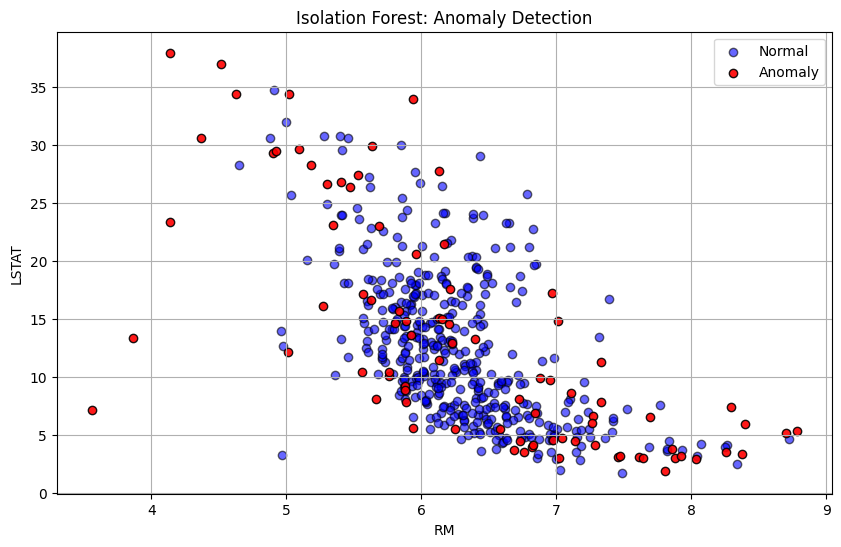

In [16]:
# write your code from here
import matplotlib.pyplot as plt

# Step 1: Choose two features for plotting
feature_x = 'RM'      # Avg number of rooms
feature_y = 'LSTAT'   # % lower status of the population

# Step 2: Create a scatter plot
plt.figure(figsize=(10, 6))

# Normal points
normal = X[X['anomaly'] == 1]
plt.scatter(normal[feature_x], normal[feature_y], 
            c='blue', label='Normal', alpha=0.6, edgecolors='k')

# Anomalies
anomalies = X[X['anomaly'] == -1]
plt.scatter(anomalies[feature_x], anomalies[feature_y], 
            c='red', label='Anomaly', alpha=0.9, edgecolors='k')

# Labels and legend
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title('Isolation Forest: Anomaly Detection')
plt.legend()
plt.grid(True)
plt.show()


### Task 5: Interpret Contamination Parameter
**Description**: Experiment with different contamination levels.

In [17]:
# write your code from here
from sklearn.ensemble import IsolationForest

# Different contamination values to try
contamination_values = [0.01, 0.05, 0.1, 0.2, 'auto']

for contamination in contamination_values:
    # Initialize model with current contamination
    iso_forest = IsolationForest(n_estimators=100, contamination=contamination, random_state=42)
    iso_forest.fit(X.drop(columns='anomaly', errors='ignore'))
    
    # Predict anomalies
    preds = iso_forest.predict(X.drop(columns='anomaly', errors='ignore'))
    
    # Count anomalies
    counts = pd.Series(preds).value_counts()
    n_anomalies = counts.get(-1, 0)
    n_normals = counts.get(1, 0)
    
    print(f"Contamination: {contamination}")
    print(f"  Normal points: {n_normals}")
    print(f"  Anomalies detected: {n_anomalies}")
    print("-" * 30)


Contamination: 0.01
  Normal points: 500
  Anomalies detected: 6
------------------------------
Contamination: 0.05
  Normal points: 480
  Anomalies detected: 26
------------------------------
Contamination: 0.1
  Normal points: 455
  Anomalies detected: 51
------------------------------
Contamination: 0.2
  Normal points: 405
  Anomalies detected: 101
------------------------------
Contamination: auto
  Normal points: 421
  Anomalies detected: 85
------------------------------
